In [2]:
#importing the necessary libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

# Input images are available in ./deep_learning_input/natural_images/

for dirname, _, filenames in os.walk('/deep_learning_input/'):
    for filename in filenames:
        (os.path.join(dirname, filename))


In [3]:
labels = os.listdir('./deep_learning_input/natural_images/')
print(labels)

['airplane', 'car', 'cat', 'dog', 'flower', 'fruit', 'motorbike', 'person']



 AIRPLANE


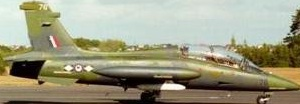

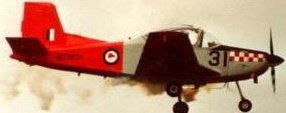

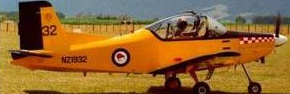

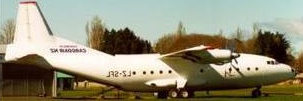

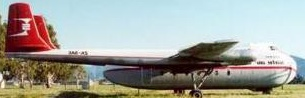

there are  727  images in  airplane class

 CAR


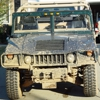

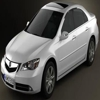

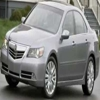

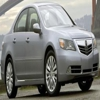

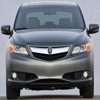

there are  968  images in  car class

 CAT


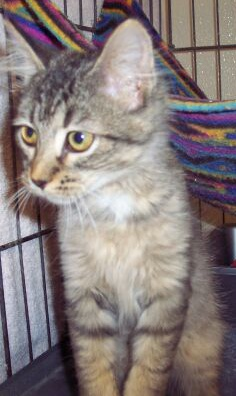

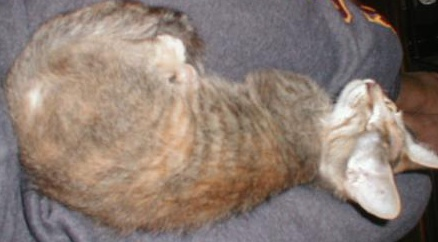

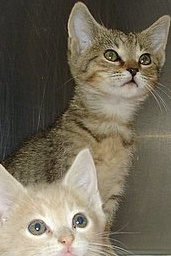

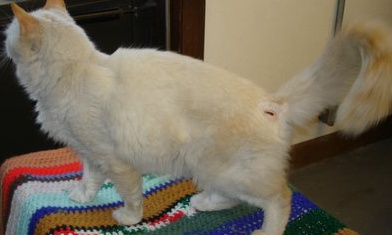

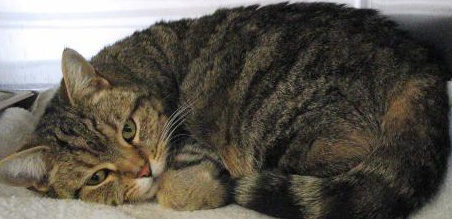

there are  885  images in  cat class

 DOG


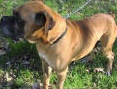

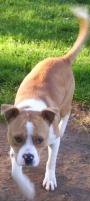

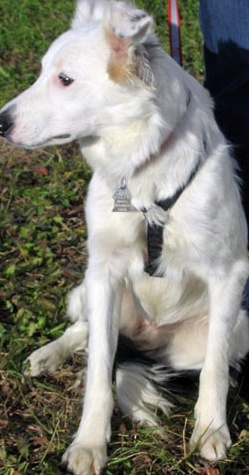

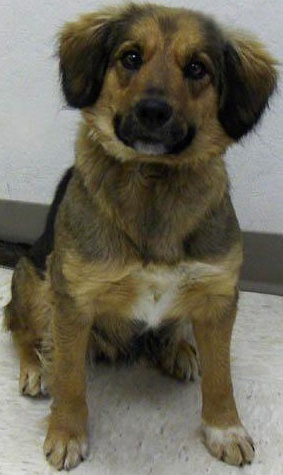

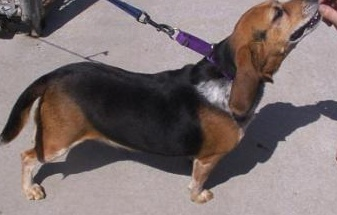

there are  702  images in  dog class

 FLOWER


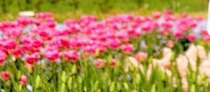

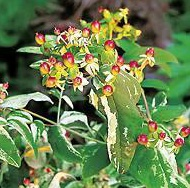

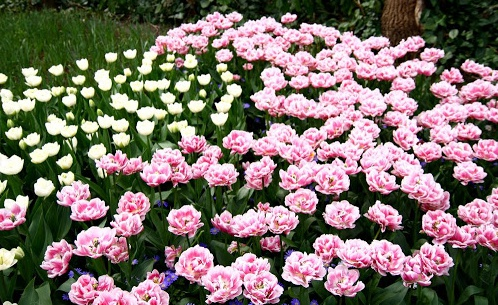

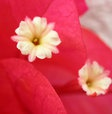

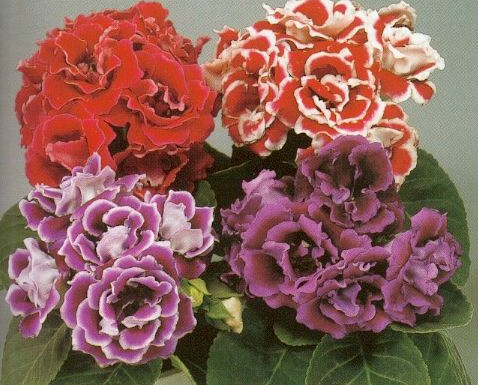

there are  843  images in  flower class

 FRUIT


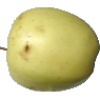

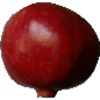

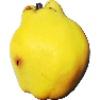

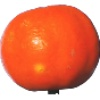

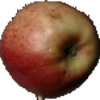

there are  1000  images in  fruit class

 MOTORBIKE


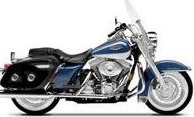

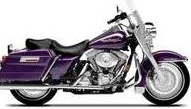

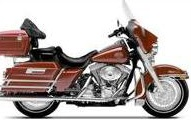

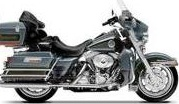

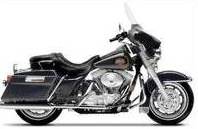

there are  788  images in  motorbike class

 PERSON


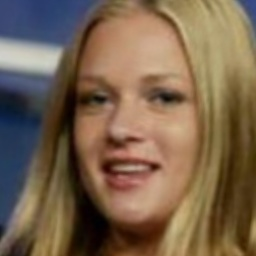

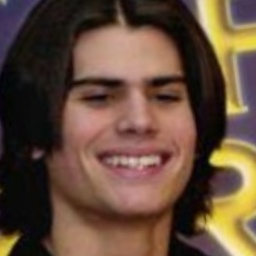

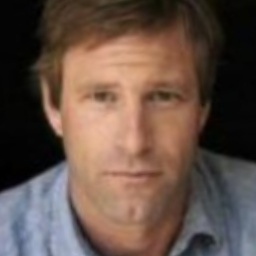

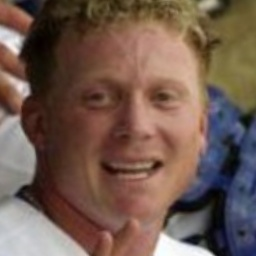

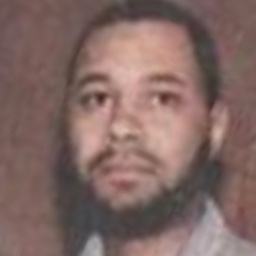

there are  986  images in  person class


In [4]:
from IPython.display import Image, display
num = []
for label in labels:
    path = './deep_learning_input/natural_images/{0}/'.format(label)
    folder_data = os.listdir(path)
    k = 0
    print('\n', label.upper())
    for image_path in folder_data:
        if k < 5:
            display(Image(path+image_path))
        k = k+1
    num.append(k)
    print('there are ', k,' images in ', label, 'class')

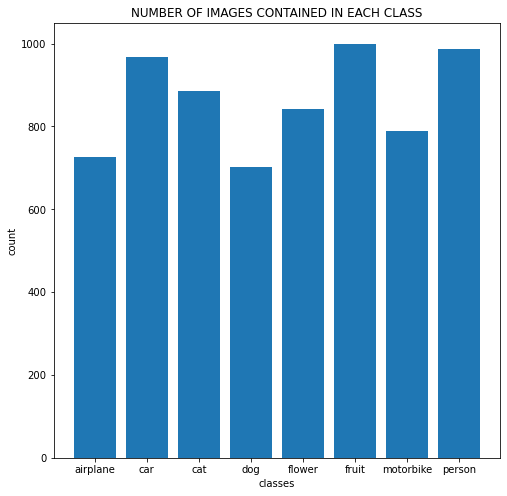

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize = (8,8))
plt.bar(labels, num)
plt.title('NUMBER OF IMAGES CONTAINED IN EACH CLASS')
plt.xlabel('classes')
plt.ylabel('count')
plt.show()

In [6]:
x_data =[]
y_data = []
import cv2
for label in labels:
    path = './deep_learning_input/natural_images/{0}/'.format(label)
    folder_data = os.listdir(path)
    for image_path in folder_data:
        image = cv2.imread(path+image_path)
        image_resized = cv2.resize(image, (32,32))
        x_data.append(np.array(image_resized))
        y_data.append(label)

In [7]:
x_data = np.array(x_data)
y_data = np.array(y_data)
print('the shape of X is: ', x_data.shape, 'and that of Y is: ', y_data.shape)

the shape of X is:  (6899, 32, 32, 3) and that of Y is:  (6899,)


In [8]:
#normalizing the pixel values
print(x_data)
x_data = x_data.astype('float32')/255
print("x data after normalizing:")
print(x_data)
print(y_data)

[[[[232 240 223]
   [233 241 224]
   [195 228 221]
   ...
   [211 217 200]
   [210 216 199]
   [212 216 204]]

  [[227 237 221]
   [231 241 225]
   [ 95 160 166]
   ...
   [211 216 201]
   [210 215 200]
   [217 219 205]]

  [[232 242 229]
   [230 240 227]
   [ 66 131 135]
   ...
   [207 212 197]
   [204 209 194]
   [205 214 204]]

  ...

  [[105 133 144]
   [ 99 131 141]
   [104 131 148]
   ...
   [ 90 112 132]
   [ 80 108 133]
   [ 84 107 129]]

  [[ 98 121 136]
   [102 121 130]
   [ 99 121 131]
   ...
   [ 85 109 129]
   [ 86 112 136]
   [ 86 110 134]]

  [[ 61  78  97]
   [  5  12  19]
   [  2  12  22]
   ...
   [ 90 112 137]
   [ 87 109 134]
   [ 84 105 132]]]


 [[[230 247 255]
   [220 249 246]
   [216 240 249]
   ...
   [167 199 212]
   [164 196 209]
   [163 195 208]]

  [[230 249 255]
   [222 250 245]
   [209 229 254]
   ...
   [167 199 212]
   [165 197 210]
   [162 194 207]]

  [[227 248 255]
   [224 250 244]
   [200 218 255]
   ...
   [167 199 212]
   [162 194 207]
   [162 194

In [9]:
#converting the y_data into categorical:

from sklearn.preprocessing import LabelEncoder
y_encoded = LabelEncoder().fit_transform(y_data)

print("y_encoded:",y_encoded)
print(y_encoded.shape)

from tensorflow.keras.utils import to_categorical
y_categorical = to_categorical(y_encoded)

print("y_categorical:",y_categorical)
print(y_categorical.shape)

y_encoded: [0 0 0 ... 7 7 7]
(6899,)
y_categorical: [[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]
(6899, 8)


In [10]:
#lets shuffle all the data we have:
r = np.arange(x_data.shape[0])
print("r: ",r)
np.random.seed(40)
np.random.shuffle(r)
X = x_data[r]
print(X.shape)
Y = y_categorical[r]
print("Y: ",Y)
print(Y.shape)

r:  [   0    1    2 ... 6896 6897 6898]
(6899, 32, 32, 3)
Y:  [[0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]]
(6899, 8)


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(4622, 32, 32, 3)
(4622, 8)
(2277, 32, 32, 3)
(2277, 8)


In [12]:
#structuring the CNN model
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dropout,Flatten,Dense

model=Sequential([Conv2D(32,5,activation='relu',input_shape=X_train.shape[1:]),
                  MaxPooling2D(pool_size=2),
                  Conv2D(64,3,activation='relu'),
                  MaxPooling2D(pool_size=2),
                  Dropout(rate=0.25),
                  Flatten(),
                  Dense(256,activation='relu'),
                  Dropout(rate=0.5),
                  Dense(8,activation='softmax')])




In [13]:
#let's compile the model
model.compile(
    loss='categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy'])

In [14]:
#fitting the model
history = model.fit(X_train, Y_train, epochs=25, validation_split=0.2)
print(history)

Epoch 1/25
116/116 [==============================] - 12s 68ms/step - loss: 1.2575 - accuracy: 0.5521 - val_loss: 0.7023 - val_accuracy: 0.7405
Epoch 2/25
116/116 [==============================] - 7s 64ms/step - loss: 0.6522 - accuracy: 0.7652 - val_loss: 0.5699 - val_accuracy: 0.7978
Epoch 3/25
116/116 [==============================] - 8s 66ms/step - loss: 0.4991 - accuracy: 0.8128 - val_loss: 0.4174 - val_accuracy: 0.8324
Epoch 4/25
116/116 [==============================] - 8s 65ms/step - loss: 0.4159 - accuracy: 0.8431 - val_loss: 0.3602 - val_accuracy: 0.8714
Epoch 5/25
116/116 [==============================] - 7s 62ms/step - loss: 0.3569 - accuracy: 0.8653 - val_loss: 0.3558 - val_accuracy: 0.8789
Epoch 6/25
116/116 [==============================] - 7s 64ms/step - loss: 0.2899 - accuracy: 0.8875 - val_loss: 0.3047 - val_accuracy: 0.8843
Epoch 7/25
116/116 [==============================] - 8s 65ms/step - loss: 0.2519 - accuracy: 0.9018 - val_loss: 0.2906 - val_accuracy: 0.896

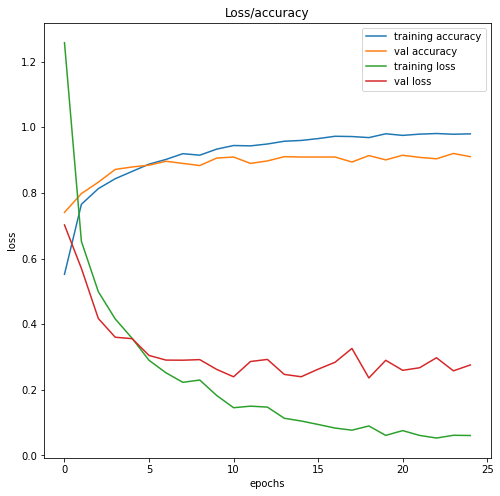

In [15]:
#Display of the accuracy and the loss values
import matplotlib.pyplot as plt

plt.figure(figsize = (8,8))
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss/accuracy')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [16]:
#Y_pred = model.predict_classes(X_test)

predict_y=model.predict(X_test) 
Y_pred=np.argmax(predict_y,axis=1)
print(Y_pred)

[7 2 1 ... 0 7 7]


In [17]:
#converting over Y test to actual labels.
print(Y_test)
Y_test = np.argmax(Y_test, axis = 1)
print(Y_test)

[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]
[7 2 1 ... 0 7 7]


In [18]:
from sklearn.metrics import accuracy_score
print('the accuracy obtained on the test set is:', accuracy_score(Y_pred,Y_test))

the accuracy obtained on the test set is: 0.9029424681598595


In [19]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       234
           1       0.93      0.94      0.94       318
           2       0.75      0.77      0.76       309
           3       0.63      0.67      0.65       222
           4       0.95      0.84      0.90       264
           5       0.99      1.00      1.00       344
           6       0.98      0.97      0.98       256
           7       0.98      0.99      0.99       330

    accuracy                           0.90      2277
   macro avg       0.90      0.89      0.90      2277
weighted avg       0.91      0.90      0.90      2277

